Importing Modules

In [1]:
import pickle
import numpy as np
from scipy.stats.stats import pearsonr

import matplotlib.pyplot as plt
import seaborn as sb
%matplotlib widget

import os

# Gathering Data

In [2]:
# this_path = os.path.dirname(os.path.abspath(__file__))
# print(this_path)
CWD = os.getcwd()

with open(f'{CWD}/FM2d.pck', 'rb') as f:
    FM = np.array(pickle.load(f)).transpose((1,2,0))
with open(f'{CWD}/genomes2d.pck', 'rb') as f:
    G  = np.array(pickle.load(f)).transpose((1,0))

N = G.shape[-1]

L = 10
FM = FM.reshape(L,L,L,L,-1)
G1  = G[:L**2,:].reshape(L,L,-1)
G2  = G[L**2:,:].reshape(L,L,-1)

# Correlating Densities to FM element

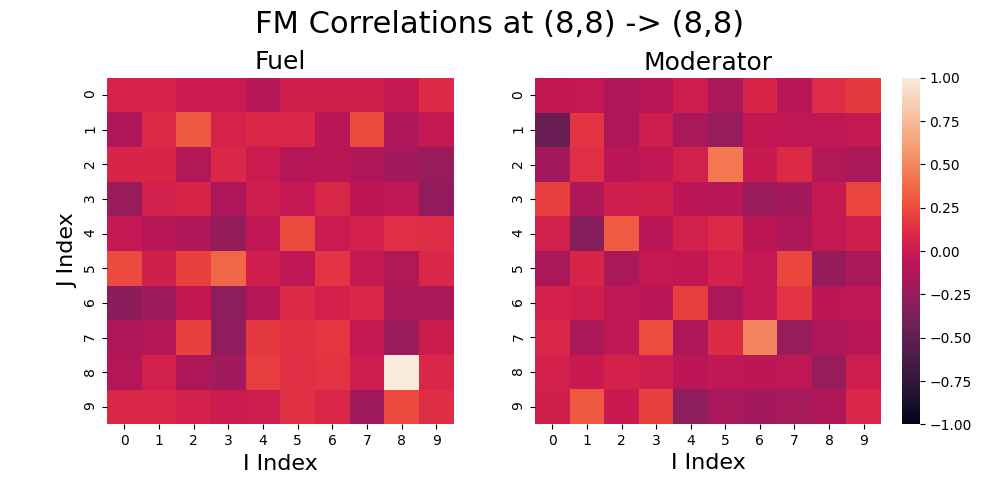

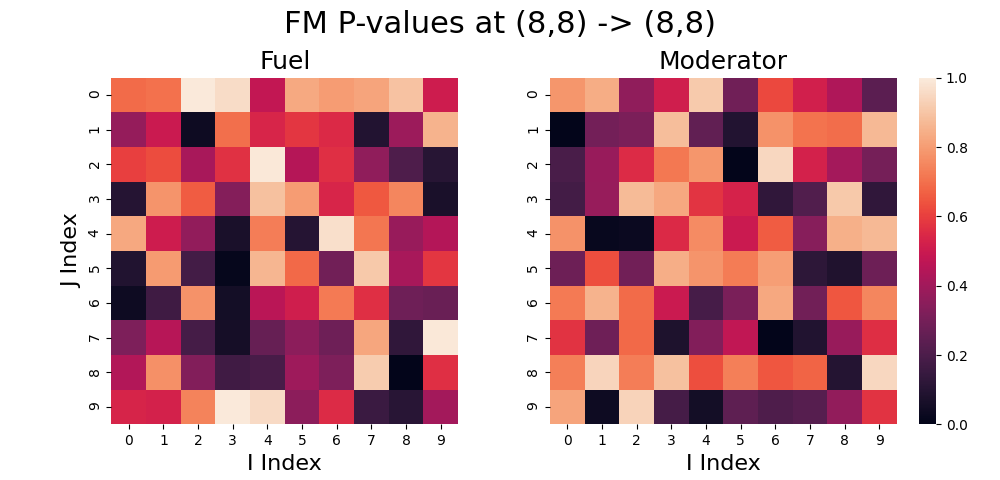

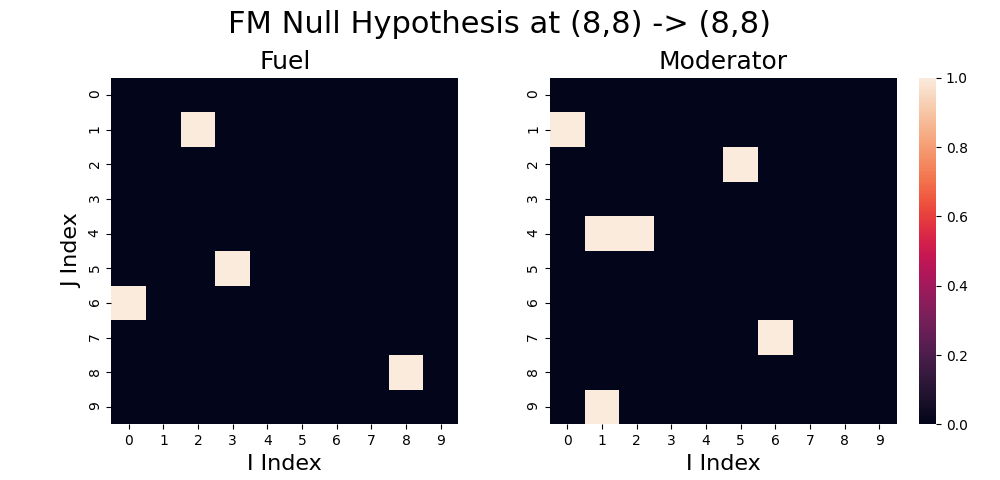

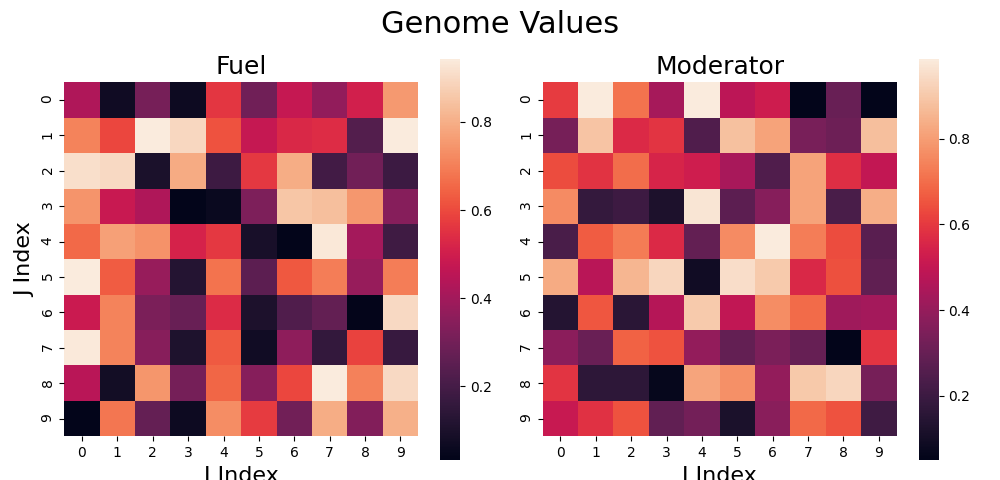

In [3]:
IDX = ((8,8),(8,8))
(IJ1,IJ2) = IDX
(I1,J1) = IJ1
(I2,J2) = IJ2

# Calculating Correlation Coefficients:
fm = FM[I2,J2,I1,J1,:]
RFM1 = np.zeros((L,L))
RFM2 = np.zeros((L,L))
PFM1 = np.zeros((L,L))
PFM2 = np.zeros((L,L))
for i in range(L):
    for j in range(L):
        g1ij = G1[i,j,:]
        g2ij = G2[i,j,:]
        RFM1[i,j], PFM1[i,j] = pearsonr(fm,g1ij)
        RFM2[i,j], PFM2[i,j] = pearsonr(fm,g2ij)



settings = {'robust':True, 'vmin':-1, 'vmax':1, 'square':True}

plt.close('all')
fig, (ax1, ax2) = plt.subplots(1, 2)
fig.suptitle(f'FM Correlations at ({I1},{J1}) -> ({I2},{J2})', fontsize=22)
fig.set_figwidth(10);   fig.set_figheight(4.8)
ax1 = sb.heatmap(RFM1, ax=ax1, **settings, cbar=False)
ax1.set_xlabel('I Index', fontsize=16)
ax1.set_ylabel('J Index', fontsize=16)
ax1.set_title('Fuel', fontsize=18)
ax2 = sb.heatmap(RFM2, ax=ax2, **settings)
ax2.set_xlabel('I Index', fontsize=16)
ax2.set_title('Moderator', fontsize=18)
fig.tight_layout()


settings = {'robust':True, 'vmin':0, 'vmax':1, 'square':True}

fig, (ax1, ax2) = plt.subplots(1, 2)
fig.suptitle(f'FM P-values at ({I1},{J1}) -> ({I2},{J2})', fontsize=22)
fig.set_figwidth(10);   fig.set_figheight(4.8)
ax1 = sb.heatmap(PFM1, ax=ax1, **settings, cbar=False)
ax1.set_xlabel('I Index', fontsize=16)
ax1.set_ylabel('J Index', fontsize=16)
ax1.set_title('Fuel', fontsize=18)
ax2 = sb.heatmap(PFM2, ax=ax2, **settings)
ax2.set_xlabel('I Index', fontsize=16)
ax2.set_title('Moderator', fontsize=18)
fig.tight_layout()

settings = {'robust':True, 'vmin':0, 'vmax':1, 'square':True}

fig, (ax1, ax2) = plt.subplots(1, 2)
fig.suptitle(f'FM Null Hypothesis at ({I1},{J1}) -> ({I2},{J2})', fontsize=22)
fig.set_figwidth(10);   fig.set_figheight(4.8)
ax1 = sb.heatmap((PFM1 <= 0.05), ax=ax1, **settings, cbar=False)
ax1.set_xlabel('I Index', fontsize=16)
ax1.set_ylabel('J Index', fontsize=16)
ax1.set_title('Fuel', fontsize=18)
ax2 = sb.heatmap((PFM2 <= 0.05), ax=ax2, **settings)
ax2.set_xlabel('I Index', fontsize=16)
ax2.set_title('Moderator', fontsize=18)
fig.tight_layout()

settings = {'robust':True, 'square':True}

fig, (ax1, ax2) = plt.subplots(1, 2)
fig.suptitle(f'Genome Values', fontsize=22)
fig.set_figwidth(10);   fig.set_figheight(4.8)
ax1 = sb.heatmap(G1[:,:,2], ax=ax1, **settings)
ax1.set_xlabel('I Index', fontsize=16)
ax1.set_ylabel('J Index', fontsize=16)
ax1.set_title('Fuel', fontsize=18)
ax2 = sb.heatmap(G2[:,:,2], ax=ax2, **settings)
ax2.set_xlabel('I Index', fontsize=16)
ax2.set_title('Moderator', fontsize=18)
fig.tight_layout()